In [2]:
import sys
!{sys.executable} -m pip  install --quiet duckdb duckdb-engine ipython-sql sqlalchemy python-snappy pyarrow memray pandas watermark ipywidgets bs4 polars rich humanize matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:
%load_ext sql

In [4]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [3]:
%sql duckdb:///my-db.duckdb

UsageError: Line magic function `%sql` not found.


In [1]:
cat goodreads.csv | head

,asin,authors,average_rating,book_id,country_code,description,edition_information,format,image_url,is_ebook,isbn,isbn13,kindle_asin,language_code,link,num_pages,popular_shelves,publication_day,publication_month,publication_year,publisher,ratings_count,series,similar_books,text_reviews_count,title,title_without_series,url,work_id
0,,"[{'author_id': '604031', 'role': ''}]",4.00,5333265,US,,,Paperback,https://images.gr-assets.com/books/1310220028m/5333265.jpg,false,0312853122,9780312853129,,,https://www.goodreads.com/book/show/5333265-w-c-fields,256,"[{'count': '3', 'name': 'to-read'} {'count': '1', 'name': 'p'}
 {'count': '1', 'name': 'collection'} {'count': '1', 'name': 'w-c-fields'}
 {'count': '1', 'name': 'biography'}]",1,9,1984,St. Martin's Press,3,[],[],1,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,https://www.goodreads.com/book/show/5333265-w-c-fields,5400751
1,,"[{'author_id': '626222', 'role': ''}]",3.23,1333909,US,"Anita Diamant's international bestseller ""The Red T

In [85]:
# Table created from CSV file 
%sql CREATE TABLE goodreads_schema AS SELECT * FROM read_csv('/Users/vicki/viberary/viberary/notebooks/goodreads.csv'
                                                      header=True, columns={'index_col': 'INTEGER', 
                                                                            'asin': 'VARCHAR', 
                                                                            'authors': 'VARCHAR', 
                                                                            'average_rating': 'DOUBLE',
                                                                           'book_id': 'INTEGER', 
                                                                           'country_code': 'VARCHAR', 
                                                                           'description': 'VARCHAR', 
                                                                           'edition_information': 'VARCHAR', 
                                                                           'format': 'VARCHAR', 
                                                                           'image_url': 'VARCHAR', 
                                                                           'is_ebook': 'VARCHAR', 
                                                                           'isbn': 'VARCHAR', 
                                                                           'isbn13': 'VARCHAR', 
                                                                           'kindle_asin': 'VARCHAR', 
                                                                           'language_code': 'VARCHAR', 
                                                                           'link': 'VARCHAR', 
                                                                           'num_pages': 'INTEGER', 
                                                                           'popular_shelves': 'LIST', 
                                                                           'publication)da': 'VARCHAR', 
                                                                           'authors': 'VARCHAR', 
                                                                           'authors': 'VARCHAR', 
                                                                           'authors': 'VARCHAR', 
                                                                           });;


,column_name,column_type,null,key,default,extra
0,column00,INTEGER,YES,None,None,None
1,asin,VARCHAR,YES,None,None,None
2,authors,VARCHAR,YES,None,None,None
3,average_rating,DOUBLE,YES,None,None,None
4,book_id,INTEGER,YES,None,None,None
5,country_code,VARCHAR,YES,None,None,None
6,description,VARCHAR,YES,None,None,None
7,edition_information,VARCHAR,YES,None,None,None
8,format,VARCHAR,YES,None,None,None
9,image_url,VARCHAR,YES,None,None,None


In [2]:
%sql DESCRIBE goodreads_schema;

UsageError: Line magic function `%sql` not found.


In [53]:
# Creating from JSON file
%sql CREATE TABLE goodreads_json AS SELECT * FROM read_json_objects('/Users/vicki/viberary/viberary/jsonparquet/src/main/resources/goodreads_books.json');

,Count
0,2360655


In [69]:
# Creating from parquet directory
%sql CREATE TABLE goodreads_pq AS SELECT * FROM '/Users/vicki/Downloads/spark-3.3.1-bin-hadoop3/goodreads_schema/*.parquet';

,Count
0,2360655


In [70]:
# Parquet file does not correctly map column types
%sql DESCRIBE goodreads_pq;

,column_name,column_type,null,key,default,extra
0,asin,VARCHAR,YES,None,None,None
1,authors,"STRUCT(author_id VARCHAR, role VARCHAR)[]",YES,None,None,None
2,average_rating,VARCHAR,YES,None,None,None
3,book_id,VARCHAR,YES,None,None,None
4,country_code,VARCHAR,YES,None,None,None
5,description,VARCHAR,YES,None,None,None
6,edition_information,VARCHAR,YES,None,None,None
7,format,VARCHAR,YES,None,None,None
8,image_url,VARCHAR,YES,None,None,None
9,is_ebook,VARCHAR,YES,None,None,None


In [80]:
%sql ALTER TABLE goodreads_pq ALTER book_id TYPE INTEGER;\
ALTER TABLE goodreads_pq ALTER num_pages TYPE INTEGER;
# ALTER TABLE goodreads_pq ALTER ratings_count TYPE INTEGER;\
# ALTER TABLE goodreads_pq ALTER text_reviews_count TYPE INTEGER;\
# ALTER TABLE goodreads_pq ALTER work_id TYPE INTEGER;\

(duckdb.ConversionException) Conversion Error: Could not convert string '' to INT32
[SQL: ALTER TABLE goodreads_pq ALTER num_pages TYPE INTEGER;]
(Background on this error at: https://sqlalche.me/e/14/9h9h)


In [ ]:
%sql DESCRIBE goodreads_pq;

In [44]:
%sql select count(*) as total_books from goodreads;

,total_books
0,2360655


In [57]:
# JSON also does not correctly map types
%sql select * from goodreads_json limit 1;

,json
0,"{""isbn"": ""0312853122"", ""text_reviews_count"": ""..."


In [38]:
%sql my_df << SELECT num_pages, count(*) AS total_books \
FROM goodreads \
GROUP BY num_pages \
ORDER BY count(*) desc;

Returning data to local variable my_df


In [83]:
%sql my_df << SELECT try_cast(num_pages as INTEGER), count(*) AS total_books \
FROM goodreads_pq \
GROUP BY num_pages \
ORDER BY count(*) desc;

Returning data to local variable my_df


In [84]:
my_df

,TRY_CAST(num_pages AS INTEGER),total_books
0,NaN,764133
1,32.0,34947
2,320.0,29945
3,256.0,29859
4,224.0,28978
...,...,...
2547,10416.0,1
2548,3203.0,1
2549,1852.0,1
2550,5012.0,1


<AxesSubplot:xlabel='num_pages', ylabel='total_books'>

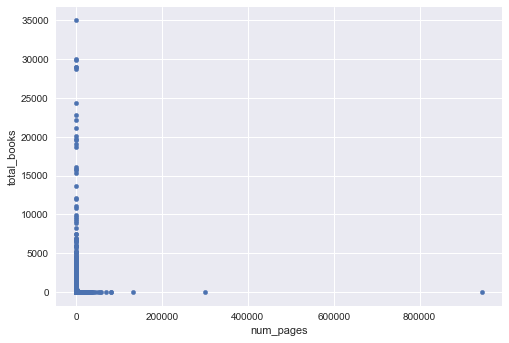

In [43]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

my_df.plot(x='num_pages', y='total_books', kind='scatter')

In [ ]:
# Throw out outliers

In [12]:
# Inspect CSV data
%sql select title,description,popular_shelves from goodreads limit 10;

,title,description,popular_shelves
0,W.C. Fields: A Life on Film,None,"[{'count': '3', 'name': 'to-read'} {'count': '..."
1,Good Harbor,"Anita Diamant's international bestseller ""The ...","[{'count': '2634', 'name': 'to-read'} {'count'..."
2,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",Omnibus book club edition containing the Ladie...,"[{'count': '58', 'name': 'to-read'} {'count': ..."
3,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'count': '7615', 'name': 'to-read'}\n {'coun..."
4,Runic Astrology: Starcraft and Timekeeping in ...,None,"[{'count': '32', 'name': 'to-read'} {'count': ..."
5,The Aeneid for Boys and Girls,"Relates in vigorous prose the tale of Aeneas, ...","[{'count': '56', 'name': 'to-read'}\n {'count'..."
6,The Wanting of Levine,None,"[{'count': '14', 'name': 'to-read'}\n {'count'..."
7,All's Fairy in Love and War (Avalon: Web of Ma...,"To Kara's astonishment, she discovers that a p...","[{'count': '515', 'name': 'to-read'} {'count':..."
8,Playmaker: A Venom Series Novella,Secrets. Sometimes keeping them in confidence ...,"[{'count': '4', 'name': 'to-read'} {'count': '..."
9,The Devil's Notebook,"Wisdom, humor, and dark observations by the fo...","[{'count': '961', 'name': 'to-read'}\n {'count..."


In [13]:
%sql text_data << select title,description,popular_shelves from goodreads limit 10;

Returning data to local variable text_data


In [22]:

text_data['popular_shelves'] = text_data['popular_shelves'].to_json()

In [1]:
text_data['popular_shelves'].head()

NameError: name 'text_data' is not defined